# AdaBoostClassifier w/ GridSearchCV (Cancer Dataset) #

In [11]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings 
warnings.simplefilter('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [12]:
# Load data
data = load_breast_cancer(as_frame=True)
df = data.frame

df.shape
df.head()
df.info()

(569, 31)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [13]:
X = df.drop('target', axis=1)
y = df['target']

X.shape, y.shape

((569, 30), (569,))

In [14]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
    , stratify=y
    , random_state=42
)

In [15]:
# Base stump to be used in the grid
stump = DecisionTreeClassifier(random_state=27)

# Construct parameter grid
param_grid = {
    'n_estimators': [10, 30, 50, 100]
    , 'learning_rate': [0.1, 0.5, 1.0]
    , 'estimator__max_depth': [1, 2]
}

# Set up AdaBoost with a decision stump (base estimator)
ada = AdaBoostClassifier(
    estimator=stump
    , random_state=27
)

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=ada
    , param_grid=param_grid
    , scoring='accuracy'
    , n_jobs=-1
    , cv=5
)

# Run grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=27),
                                          random_state=27),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [1, 2],
                         'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [10, 30, 50, 100]},
             scoring='accuracy')

In [16]:
# Best parameters and estimator
grid_search.best_params_
grid_search.best_score_

{'estimator__max_depth': 1, 'learning_rate': 1.0, 'n_estimators': 100}

0.9714285714285715

In [21]:
best_ada_boost = grid_search.best_estimator_
best_ada_boost.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=27),
                   n_estimators=100, random_state=27)

In [22]:
# See how the best boosted model does on test data:
best_ada_boost = grid_search.best_estimator_
best_ada_boost.fit(X_train, y_train)
best_ada_boost.score(X_test, y_test)

0.956140350877193

In [24]:
# Test the base for shytes n giggles:

ada.fit(X_train, y_train)
ada.score(X_test, y_test)

AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=27),
                   random_state=27)

0.9122807017543859

In [17]:
# Predictions using the best estimator
y_pred = grid_search.best_estimator_.predict(
    X_test)

In [19]:
# Evaluation metrics
accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

0.956140350877193

array([[38,  4],
       [ 1, 71]])

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [25]:
from sklearn.metrics import (confusion_matrix
                             , classification_report 
                             , ConfusionMatrixDisplay 
                             , roc_auc_score 
                             , RocCurveDisplay 
                             , PrecisionRecallDisplay )

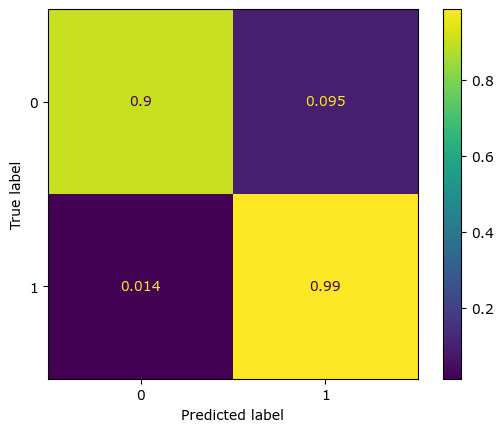

In [27]:
ConfusionMatrixDisplay.from_estimator(
    best_ada_boost, X_test, y_test
    , normalize='true'
);